## 20201129 AMK-1057 truncations, alanine scans replicates combined

Overview:
- Note: this doesn't include the IRAY alanine scans / truncations (Andrew did these)
- 3 replicates on 3 different days:
    - 20201101, 20201125, 20201126

Conditions:
- 30C, TB media, deepwell plates
- Cumate: 100uM (induces papB)
- OC6AHL: 0, 1uM (induces RiPP half of intein)

Note:
- ran the "wrong" parent strain for the 2 later replicates... Andrew probably ran the right one
    - 2 later replicates use sDAA845 (which is the same as sAMK-999); this has a different output plasmid (PheS rather than hsvtk) than the output plasmid used for all other experiments
    - should have used sDAA869 instead of sDAA845 as parent
    - fuck it i'm just combining them

Strains:

|Strain name| Description|
|---|---|
sDAA822|V1A mutation w/ RBD intein + pcym-pap
sDAA823|C2A mutation w/ RBD intein + pcym-pap
sDAA824|K3A mutation w/ RBD intein + pcym-pap
sDAA825|Y4A mutation w/ RBD intein + pcym-pap
sDAA826|G5A mutation w/ RBD intein + pcym-pap
sDAA827|E6A mutation w/ RBD intein + pcym-pap
sDAA828|W7A mutation w/ RBD intein + pcym-pap
sDAA829|C8A mutation w/ RBD intein + pcym-pap
sDAA830|E9A mutation w/ RBD intein + pcym-pap
sDAA831|I10A mutation w/ RBD intein + pcym-pap
sDAA832|V11A mutation w/ RBD intein + pcym-pap
sDAA833|E12A mutation w/ RBD intein + pcym-pap
sDAA834|I13A mutation w/ RBD intein + pcym-pap
sDAA835|Truncation 2-13; no TEV w/ RBD intein + pcym-pap
sDAA836|Truncation 3-13; no TEV w/ RBD intein + pcym-pap
sDAA837|Truncation 4-13; no TEV w/ RBD intein + pcym-pap
sDAA838|Truncation 5-13; no TEV w/ RBD intein + pcym-pap
sDAA839|Truncation 6-13; no TEV w/ RBD intein + pcym-pap
sDAA840|Truncation 7-13; no TEV w/ RBD intein + pcym-pap
sDAA841|Truncation 8-13; no TEV w/ RBD intein + pcym-pap
sDAA842|Full length + TEV w/ RBD intein + pcym-pap
sDAA845|Same as sAMK-999 (RBD pap2c hit in selection system)
sDAA846|V1A mutation w/ mdm2 intein + pcym-pap
sDAA847|C2A mutation w/ mdm2 intein + pcym-pap
sDAA848|K3A mutation w/ mdm2 intein + pcym-pap
sDAA849|Y4A mutation w/ mdm2 intein + pcym-pap
sDAA850|G5A mutation w/ mdm2 intein + pcym-pap
sDAA851|E6A mutation w/ mdm2 intein + pcym-pap
sDAA852|W7A mutation w/ mdm2 intein + pcym-pap
sDAA853|C8A mutation w/ mdm2 intein + pcym-pap
sDAA854|E9A mutation w/ mdm2 intein + pcym-pap
sDAA855|I10A mutation w/ mdm2 intein + pcym-pap
sDAA856|V11A mutation w/ mdm2 intein + pcym-pap
sDAA857|E12A mutation w/ mdm2 intein + pcym-pap
sDAA858|I13A mutation w/ mdm2 intein + pcym-pap
sDAA859|Truncation 2-13; no TEV w/ mdm2 intein + pcym-pap
sDAA860|Truncation 3-13; no TEV w/ mdm2 intein + pcym-pap
sDAA861|Truncation 4-13; no TEV w/ mdm2 intein + pcym-pap
sDAA862|Truncation 5-13; no TEV w/ mdm2 intein + pcym-pap
sDAA863|Truncation 6-13; no TEV w/ mdm2 intein + pcym-pap
sDAA864|Truncation 7-13; no TEV w/ mdm2 intein + pcym-pap
sDAA865|Truncation 8-13; no TEV w/ mdm2 intein + pcym-pap
sDAA866|Full length + TEV w/ mdm2 intein + pcym-pap
sDAA867|RBD pap2c hit w/ mdm2 intein + pcym-pap
sDAA869|RBD pap2c hit w/ RBD intein + pcym-pap

In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import sys
import cytoflow as flow
import string
import pandas as pd
import seaborn as sns
from scipy import stats
import re
import matplotlib.colors as colors

sys.path.append('../modules')
import cf_imports
import cf_helpers

In [2]:
import matplotlib
%matplotlib inline

In [3]:
matplotlib.rc('figure', dpi = 150)
sns.set_style('ticks')

In [4]:
# Import reloads for when modules are being changed
import importlib
importlib.reload(cf_imports)
importlib.reload(cf_helpers)

<module 'cf_helpers' from '../modules\\cf_helpers.py'>

## Data Import

In [7]:
for i, exp_dir in enumerate(exp_dirs):
    print(i)

0
1
2


In [12]:
# Provide full path to flow cytometry .fcs file directory and pass to fixer
exp_dirs = [
    r'C:\Users\Dan\Dropbox (MIT)\Flow Data\20201101_pap2c_hit_vars_ind_rep2',
    r'C:\Users\Dan\Dropbox (MIT)\Flow Data\20201125_pmi_var_amk1057_vars_rep2\20201125_pmi_var_amk1057_vars_plate2_amk1057_vars',
    r'C:\Users\Dan\Dropbox (MIT)\Flow Data\20201126_pmi_var_amk1057_vars_rep3\20201126_pmi_var_amk1057_vars_rep3_plate2'
]
    
conds_dir = None

for i, exp_dir in enumerate(exp_dirs):
    fcs_dir = cf_imports.dir_fix(exp_dir)
    exp = cf_imports.exp_from_dirs(fcs_dir, conds_dir, event_num = 20000) #subset 10000 events

    # Extract df and remove values below 0
    df = exp.data
    if i == 0:
        exp_df = df
    else:
        exp_df = exp_df.append(df)

['C:/Users/Dan/Dropbox (MIT)/Flow '
 'Data/20201101_pap2c_hit_vars_ind_rep2\\Specimen_001_A1_A01.fcs',
 'C:/Users/Dan/Dropbox (MIT)/Flow '
 'Data/20201101_pap2c_hit_vars_ind_rep2\\Specimen_001_A2_A02.fcs',
 'C:/Users/Dan/Dropbox (MIT)/Flow '
 'Data/20201101_pap2c_hit_vars_ind_rep2\\Specimen_001_A3_A03.fcs',
 'C:/Users/Dan/Dropbox (MIT)/Flow '
 'Data/20201101_pap2c_hit_vars_ind_rep2\\Specimen_001_A4_A04.fcs',
 'C:/Users/Dan/Dropbox (MIT)/Flow '
 'Data/20201101_pap2c_hit_vars_ind_rep2\\Specimen_001_A5_A05.fcs',
 'C:/Users/Dan/Dropbox (MIT)/Flow '
 'Data/20201101_pap2c_hit_vars_ind_rep2\\Specimen_001_A6_A06.fcs',
 'C:/Users/Dan/Dropbox (MIT)/Flow '
 'Data/20201101_pap2c_hit_vars_ind_rep2\\Specimen_001_A7_A07.fcs',
 'C:/Users/Dan/Dropbox (MIT)/Flow '
 'Data/20201101_pap2c_hit_vars_ind_rep2\\Specimen_001_A8_A08.fcs',
 'C:/Users/Dan/Dropbox (MIT)/Flow '
 'Data/20201101_pap2c_hit_vars_ind_rep2\\Specimen_001_A9_A09.fcs',
 'C:/Users/Dan/Dropbox (MIT)/Flow '
 'Data/20201101_pap2c_hit_vars_ind_re

In [5]:
# Pickle the dataframe so we don't have to import everything every time
#exp_df.to_pickle('AMK-1057-var-all-reps_df.pkl')
exp_df = pd.read_pickle('AMK-1057-var-all-reps_df.pkl')

### Generate strain / name mapping

## Extract median GFP values

In [6]:
exp_df_median = exp_df.groupby(['strain','name', 'AHL', 'bait', 'type', 'repl']).agg('median')['FITC-A'].reset_index().dropna()

In [7]:
exp_df_median.head()

,strain,name,AHL,bait,type,repl,FITC-A
153,sDAA822,V1A,0.0,rbd,ala,1,33.480000
154,sDAA822,V1A,0.0,rbd,ala,2,28.830000
155,sDAA822,V1A,0.0,rbd,ala,3,28.830000
171,sDAA822,V1A,1.0,rbd,ala,1,718.890015
172,sDAA822,V1A,1.0,rbd,ala,2,408.269989


## Plot fluorescence values

In [8]:
ala_order = ['V1A', 'C2A', 'K3A','Y4A','G5A','E6A','W7A','C8A','E9A','I10A','V11A','E12A','I13A', 'parent']
trunc_order = ['Trunc 2-13','Trunc 3-13','Trunc 4-13','Trunc 5-13','Trunc 6-13','Trunc 7-13','Trunc 8-13', 'parent']
tev_order = ['parent','parent_tev']

orders = {'ala': ala_order, 'trunc': trunc_order, 'parent': tev_order}

['V1A', 'C2A', 'K3A', 'Y4A', 'G5A', ..., 'V11A', 'E12A', 'I13A', 'parent_tev', 'parent']
Length: 15
Categories (15, object): ['V1A', 'C2A', 'K3A', 'Y4A', ..., 'E12A', 'I13A', 'parent_tev', 'parent']
['Trunc 2-13', 'Trunc 3-13', 'Trunc 4-13', 'Trunc 5-13', 'Trunc 6-13', 'Trunc 7-13', 'Trunc 8-13', 'parent_tev', 'parent']
Categories (9, object): ['Trunc 2-13', 'Trunc 3-13', 'Trunc 4-13', 'Trunc 5-13', ..., 'Trunc 7-13', 'Trunc 8-13', 'parent_tev', 'parent']
['parent_tev', 'parent']
Categories (2, object): ['parent_tev', 'parent']


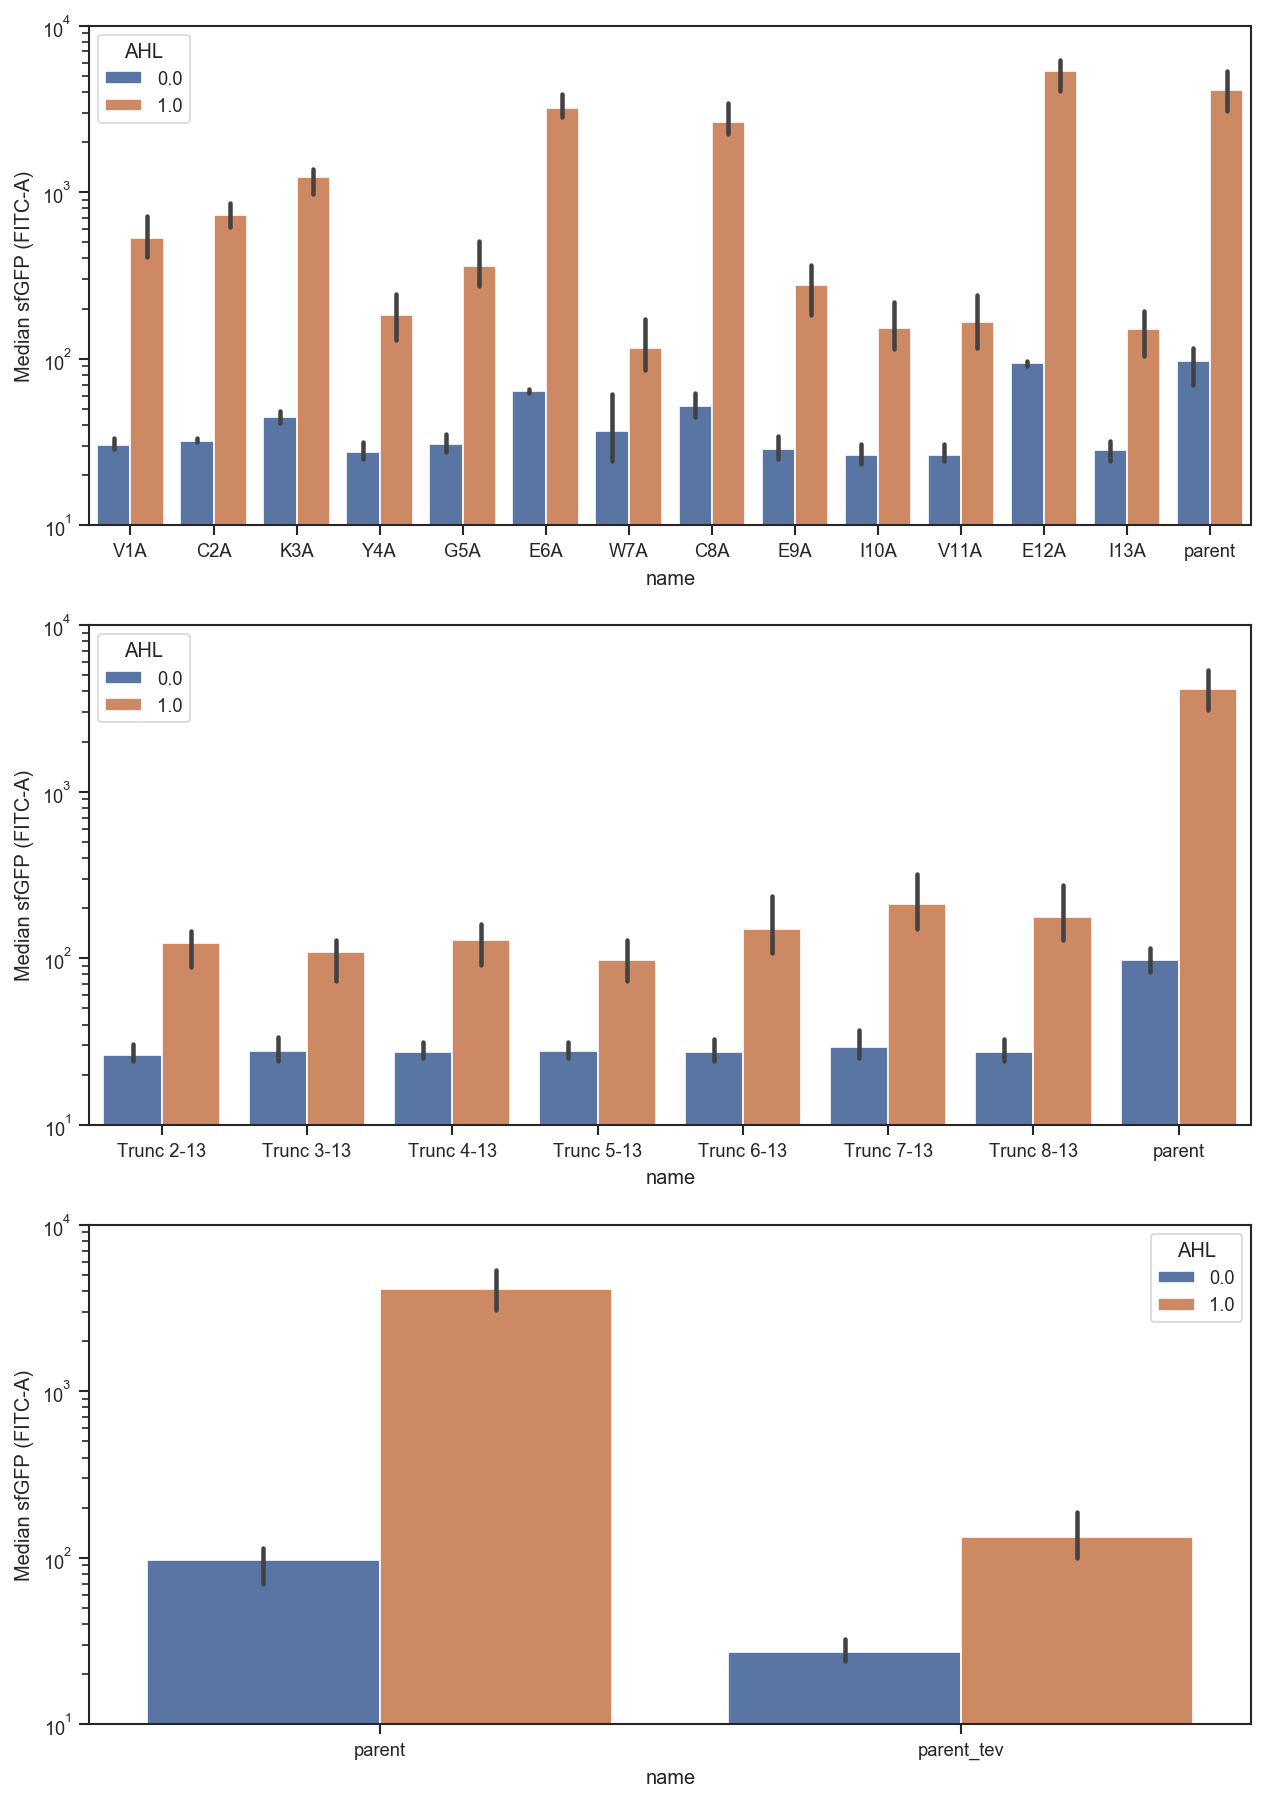

In [9]:
fig, axs = plt.subplots(figsize = (10,15), nrows = 3)

for mut_type,ax in zip(['ala', 'trunc', 'parent'],axs):
    
    order = orders[mut_type]
    
    sub_df = exp_df_median[(exp_df_median['type'].isin([mut_type, 'parent'])) & (exp_df_median['bait'] == 'rbd')]
    print(sub_df['name'].unique())
                            
    g = sns.barplot(x = 'name', y = 'FITC-A', hue = 'AHL',  data = sub_df, ax = ax, order = order)

    ax.set_ylabel('Median sfGFP (FITC-A)')
    ax.set_yscale('log')
    ax.set_ylim(1e1,1e4)

plt.show()

# Plots for manuscript

In [10]:
import matplotlib as mpl

# Set matplotlib parameters
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.transparent'] = True

Alanine scans

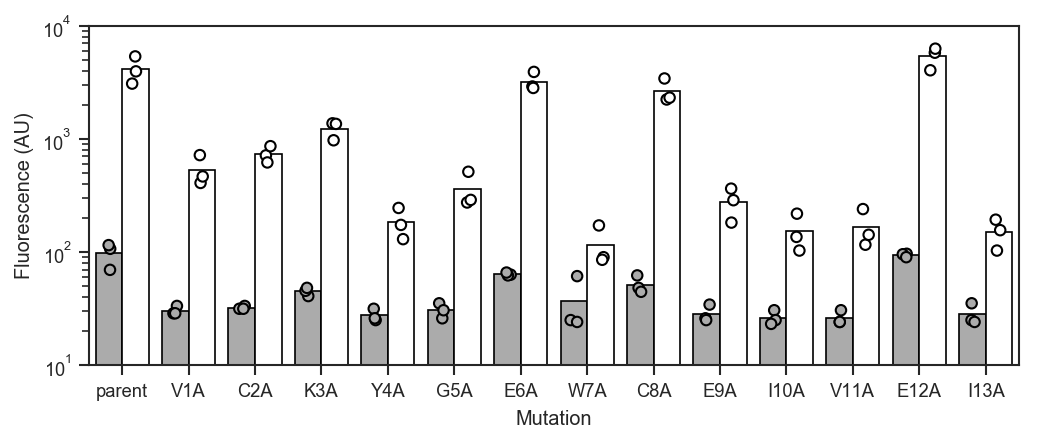

In [11]:
order = ['parent', 'V1A', 'C2A', 'K3A','Y4A','G5A','E6A','W7A','C8A','E9A','I10A','V11A','E12A','I13A', ]

mut_type = 'ala'

fig, ax = plt.subplots(figsize = (8,3))
    
sub_df = exp_df_median[(exp_df_median['type'].isin([mut_type, 'parent'])) & (exp_df_median['bait'] == 'rbd')]

sns.set_palette(sns.color_palette(['#ababab','#FFFFFF']))

sns.barplot(
    x = 'name', y = 'FITC-A', hue = 'AHL',  data = sub_df, ax = ax, order = order, ci = None,
    edgecolor = 'black'
)
sns.stripplot(x = 'name', y = 'FITC-A', hue = 'AHL',  data = sub_df, ax = ax, order = order, dodge = True,
              edgecolor = 'black', linewidth = 1)

ax.set_ylabel('Fluorescence (AU)')
ax.set_xlabel('Mutation')
ax.set_yscale('log')
ax.set_ylim(1e1,1e4)

#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, frameon = False, title = 'OC6-AHL (nM)')
ax.get_legend().remove()

plt.savefig(r"C:\Users\Dan\Dropbox (MIT)\COVID manuscript\figures\python_figures" + "/" + 'alanine_scans.pdf')
plt.show()

Truncations

In [12]:
sub_df = exp_df_median[(exp_df_median['type'].isin([mut_type, 'parent'])) & (exp_df_median['bait'] == 'rbd')]


sub_df.replace(rename_dict, inplace = True)
sub_df

NameError: name 'rename_dict' is not defined

In [22]:
sub_df = exp_df_median[(exp_df_median['type'].isin(['trunc', 'parent'])) & (exp_df_median['bait'] == 'rbd')]
sub_df

,strain,name,AHL,bait,type,repl,FITC-A
10635,sDAA835,Trunc 2-13,0.0,rbd,trunc,1,30.690001
10636,sDAA835,Trunc 2-13,0.0,rbd,trunc,2,24.180000
10637,sDAA835,Trunc 2-13,0.0,rbd,trunc,3,24.180000
10653,sDAA835,Trunc 2-13,1.0,rbd,trunc,1,138.570007
10654,sDAA835,Trunc 2-13,1.0,rbd,trunc,2,88.349998
10655,sDAA835,Trunc 2-13,1.0,rbd,trunc,3,145.080002
11859,sDAA836,Trunc 3-13,0.0,rbd,trunc,1,33.480000
11860,sDAA836,Trunc 3-13,0.0,rbd,trunc,2,24.180000
11861,sDAA836,Trunc 3-13,0.0,rbd,trunc,3,26.040001
11877,sDAA836,Trunc 3-13,1.0,rbd,trunc,1,125.550003


C:\Users\Dan\Anaconda3\envs\cf_upd_seaborn\lib\site-packages\pandas\core\frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


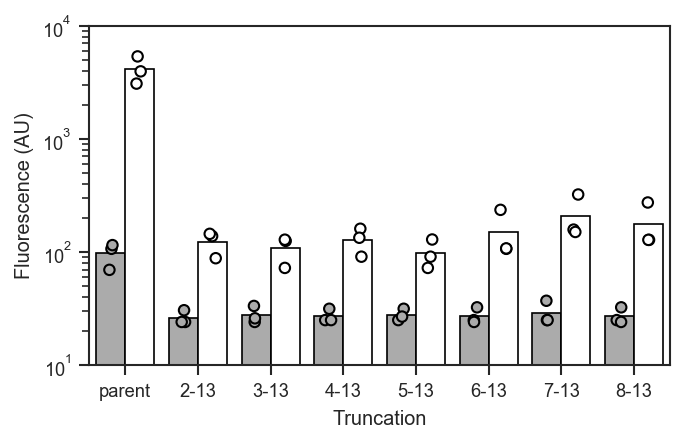

In [23]:
order = ['parent','2-13','3-13','4-13','5-13','6-13','7-13','8-13', ]

sub_df = exp_df_median[(exp_df_median['type'].isin(['trunc', 'parent'])) & (exp_df_median['bait'] == 'rbd')]

# change the names of the truncatinos
orig_names = sub_df[sub_df['type'] == 'trunc']['name'].values
new_names = sub_df[sub_df['type'] == 'trunc']['name'].apply(lambda x: x[6:]).values
rename_dict = dict(zip(orig_names, new_names))
sub_df.replace(rename_dict, inplace = True)

fig, ax = plt.subplots(figsize = (5,3))
    
sns.set_palette(sns.color_palette(['#ababab','#FFFFFF']))

sns.barplot(
    x = 'name', y = 'FITC-A', hue = 'AHL',  data = sub_df, ax = ax, order = order, ci = None,
    edgecolor = 'black'
)
sns.stripplot(x = 'name', y = 'FITC-A', hue = 'AHL',  data = sub_df, ax = ax, order = order, dodge = True,
              edgecolor = 'black', linewidth = 1)

ax.set_ylabel('Fluorescence (AU)')
ax.set_xlabel('Truncation')
ax.set_yscale('log')
ax.set_ylim(1e1,1e4)

#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, frameon = False, title = 'OC6-AHL (nM)')
ax.get_legend().remove()

plt.savefig(r"C:\Users\Dan\Dropbox (MIT)\COVID manuscript\figures\python_figures" + "/" + 'truncations.pdf')
plt.show()

## Export data for figure

In [26]:
sub_df = exp_df_median[(exp_df_median['type'].isin(['trunc', 'parent'])) & (exp_df_median['bait'] == 'rbd')]
sub_df.to_csv('fig3a_data.csv')

## Representative flow plots

#### For truncations

In [ ]:
# Subset the experimental dataframe to only include truncations and the parent
strains = ['parent','Trunc 2-13','Trunc 3-13','Trunc 4-13','Trunc 5-13','Trunc 6-13','Trunc 7-13','Trunc 8-13', ]
sub_df = exp_df[
    (exp_df['name'].isin(strains)) &
    (exp_df['FITC-A'] > 0) &
    (exp_df['AHL'] == 1)
]

# Also remove all but one of the parents
sub_df = sub_df[~sub_df['strain'].isin(['sDAA845', 'sDAA869'])]

sub_df['name'] = sub_df['name'].cat.remove_unused_categories()

In [ ]:
sub_df['name'].unique()

In [ ]:
sub_df.head()

In [ ]:
# Pull one replicate and plot it
sub_df_rep = sub_df[sub_df['repl'] == '1']

# Create a Facetgrid with columns being different strain
g = sns.FacetGrid(sub_df_rep, col = 'name', col_wrap = 4, col_order = strains)

# Map the KDEplot function (histogram) onto it
g.map_dataframe(sns.kdeplot, x = 'FITC-A', log_scale = True, bw_adjust = 0.5)
g.set_axis_labels("FITC-A", "Probability")

plt.savefig(r"C:\Users\Dan\Dropbox (MIT)\COVID manuscript\figures\python_figures" + "/" + 'truncations_rep_distr.pdf')
plt.show()